In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [3]:
data = pd.read_csv('AAPL_sent_news.csv')

In [4]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [5]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [6]:
data = data.set_index('date')

In [7]:
data = data.drop(['publication_date'], axis=1)

In [8]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-05-24 00:17:38,-0.2960,Wall Street dips; Apple gain fails to offset r...,0.350,0.438,0.212,-1
2016-05-24 08:42:12,0.6318,More challenges than cheer for Apple chief on ...,0.000,0.608,0.392,1
2016-05-25 17:48:27,0.0000,India says Apple must sell locally-sourced goo...,0.000,1.000,0.000,0
2016-05-30 17:05:39,0.0000,India discussing Apple's request for FDI rules...,0.000,1.000,0.000,0
2016-06-01 08:29:12,0.0000,Apple plans to sell $1 bln of 30-yr bonds in T...,0.000,1.000,0.000,0
2016-06-02 20:16:42,0.4019,S&P 500 closes at seven-month high on data boost,0.000,0.748,0.252,1
2016-06-20 12:40:46,0.0000,India opens the door for Apple retail with new...,0.000,1.000,0.000,0
2016-06-22 03:12:40,-0.3818,Samsung takes fight to Apple with mobile walle...,0.245,0.755,0.000,-1
2016-06-23 10:22:07,0.0000,High-end smartphone market set to grow in Indi...,0.000,1.000,0.000,0


In [9]:
news_daily = data.resample('D').mean()

In [10]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [11]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-05-24,0.1679,0.175,0.523,0.302,0.0
2016-05-25,0.0000,0.000,1.000,0.000,0.0
2016-05-26,0.0000,0.000,0.000,0.000,0.0
2016-05-27,0.0000,0.000,0.000,0.000,0.0
2016-05-28,0.0000,0.000,0.000,0.000,0.0


In [12]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [13]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.047188,0.061458,0.820976,0.091108,0.101900
std,0.082155,0.032604,0.142737,0.040458,0.184585
min,-0.476700,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.043086,0.818494,0.070792,0.000000
50%,0.045771,0.059887,0.845201,0.088604,0.100000
75%,0.089102,0.077225,0.868185,0.108849,0.200000
max,0.468850,0.280667,1.000000,0.316000,1.000000


### Fundamental Data

In [14]:
fund = pd.read_csv('AAPL_Fund.csv')
fund.head()

,date,date.1,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,06/08/2019,06/08/2019,9.060000e+11,9.3978,16.2756,0.018731,0.061442,5.554745e+10,4.396045e+10,0.491282,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.144517
1,05/08/2019,05/08/2019,8.900000e+11,9.2232,15.9733,0.019086,0.062605,5.554745e+10,4.396045e+10,0.491282,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.144517
2,02/08/2019,02/08/2019,9.390000e+11,9.7327,16.8556,0.018086,0.059327,5.554745e+10,4.396045e+10,0.491282,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.144517
3,01/08/2019,01/08/2019,9.590000e+11,9.9430,17.2200,0.017704,0.058072,5.554745e+10,4.396045e+10,0.491282,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.144517
4,31/07/2019,31/07/2019,9.800000e+11,10.1630,17.6008,0.017321,0.056816,5.554745e+10,4.396045e+10,0.491282,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.392600


In [15]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [16]:

fund.index =fund['date']

In [17]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [18]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 36 columns):
date                              754 non-null datetime64[ns]
date.1                            754 non-null object
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null float64
freecashflow                      754 non-null float64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null float64
currentratio                      754 non-nul

### Price analysis

In [22]:
df_price = pd.read_csv('apple_price.csv')

In [23]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [24]:
#df_price = df_price.drop(['date'], axis=1)

In [25]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-06,0,197.00,198.067,194.0400,196.31,35824787.0,197.00,2019-08-06,daily,198.067,False,194.0400,196.31,35824787.0
2019-08-05,1,193.34,198.649,192.5800,197.99,52392969.0,193.34,2019-08-05,daily,198.649,False,192.5800,197.99,52392969.0
2019-08-02,2,204.02,206.430,201.6300,205.53,40862122.0,204.02,2019-08-02,daily,206.430,False,201.6300,205.53,40862122.0
2019-08-01,3,208.43,218.030,206.7435,213.90,54017922.0,208.43,2019-08-01,daily,218.030,False,206.7435,213.90,54017922.0
2019-07-31,4,213.04,221.370,211.3000,216.42,69281361.0,213.04,2019-07-31,daily,221.370,False,211.3000,216.42,69281361.0


In [26]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-06 to 2014-10-29
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [27]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [28]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-07-01,25,201.55,204.490,200.65,203.17,27316739.0,201.55,2019-07-01,daily,204.490,False,200.65,203.17,27316739.0
2019-06-28,26,197.92,199.495,197.05,198.68,31110642.0,197.92,2019-06-28,daily,199.495,False,197.05,198.68,31110642.0
2019-06-27,27,199.74,201.570,199.57,200.29,20899717.0,199.74,2019-06-27,daily,201.570,False,199.57,200.29,20899717.0
2019-06-26,28,199.80,200.990,197.35,197.77,26067512.0,199.80,2019-06-26,daily,200.990,False,197.35,197.77,26067512.0
2019-06-25,29,195.57,199.260,195.29,198.43,21070334.0,195.57,2019-06-25,daily,199.260,False,195.29,198.43,21070334.0


In [29]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [30]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df_price.index =df_price['date']

In [32]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,25,201.55,204.490,200.65,203.17,27316739.0,201.55,2019-07-01,daily,204.490,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.3855
2019-06-28,26,197.92,199.495,197.05,198.68,31110642.0,197.92,2019-06-28,daily,199.495,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.3855
2019-06-27,27,199.74,201.570,199.57,200.29,20899717.0,199.74,2019-06-27,daily,201.570,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.3553
2019-06-26,28,199.80,200.990,197.35,197.77,26067512.0,199.80,2019-06-26,daily,200.990,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.3553
2019-06-25,29,195.57,199.260,195.29,198.43,21070334.0,195.57,2019-06-25,daily,199.260,...,7.925800e+10,3.420000e+11,2.360000e+11,1.130000e+11,5.717000e+10,7.185600e+10,2.013800e+10,-9.723600e+10,1.450000e+11,1.3553


In [33]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01     25
2019-06-28     26
2019-06-27     27
2019-06-26     28
2019-06-25     29
2019-06-24     30
2019-06-21     31
2019-06-20     32
2019-06-19     33
2019-06-18     34
2019-06-17     35
2019-06-14     36
2019-06-13     37
2019-06-12     38
2019-06-11     39
2019-06-10     40
2019-06-07     41
2019-06-06     42
2019-06-05     43
2019-06-04     44
2019-06-03     45
2019-05-31     46
2019-05-30     47
2019-05-29     48
2019-05-28     49
2019-05-24     50
2019-05-23     51
2019-05-22     52
2019-05-21     53
2019-05-20     54
             ... 
2016-08-12    749
2016-08-11    750
2016-08-10    751
2016-08-09    752
2016-08-08    753
2016-08-05    754
2016-08-04    755
2016-08-03    756
2016-08-02    757
2016-08-01    758
2016-07-29    759
2016-07-28    760
2016-07-27    761
2016-07-26    762
2016-07-25    763
2016-07-22    764
2016-07-21    765
2016-07-20    766
2016-07-19    767
2016-07-18    768
2016-07-15    769
2016-07-14    770
2016-07-13  

In [34]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 50 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
date.1                            754 non-null obj

In [35]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [36]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'compound', 'date.1', 'marketcap',
       'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield',
       'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [37]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [38]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [39]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 50 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
date.1                            754 non-null obj

### EDA

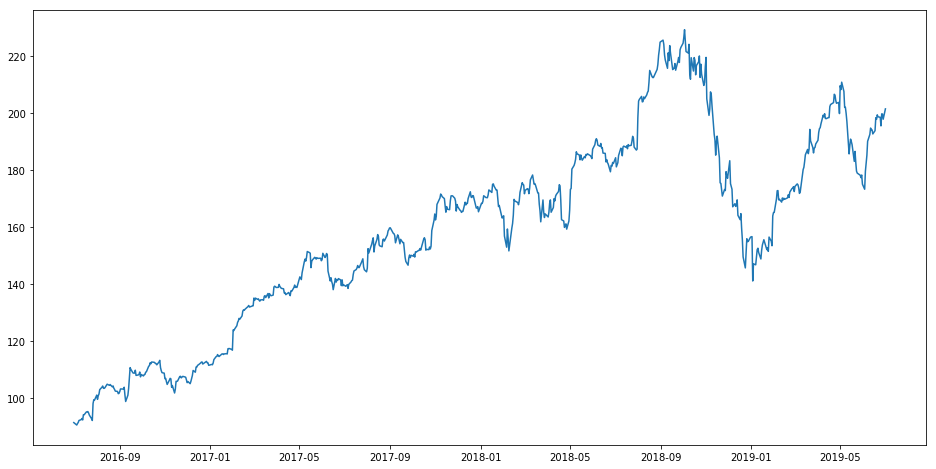

In [40]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

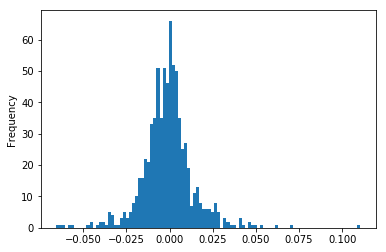

In [41]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

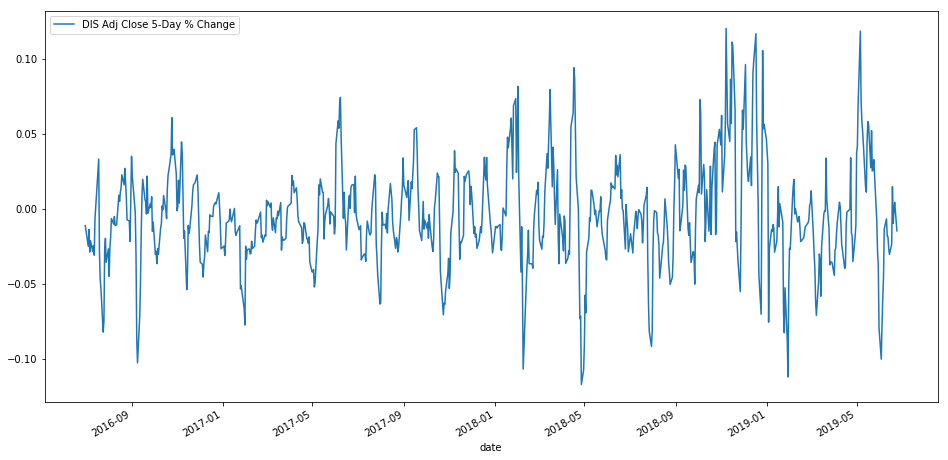

In [42]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='DIS Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.070816
5d_close_future_pct      0.070816             1.000000


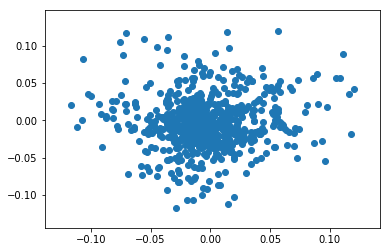

In [43]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.247557
5d_close_future_pct -0.247557             1.000000


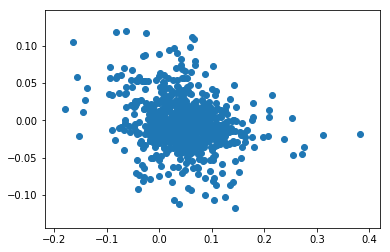

In [44]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

In [45]:
import talib

In [46]:
MACD = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
STOCH = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [47]:
data = [MACD, STOCH]
df = pd.DataFrame(data)

In [48]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [49]:
df1 = df_price.copy()

In [50]:
#df1.join(df123['compound'],how='right')

In [103]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14      ma50  \
5d_close_future_pct             1.000000     -0.012151  0.085216  0.193798   
5d_close_pct                   -0.012151      1.000000 -0.856556 -0.494687   
ma14                            0.085216     -0.856556  1.000000  0.685200   
ma50                            0.193798     -0.494687  0.685200  1.000000   
rsi50                          -0.146971      0.321827 -0.437983 -0.707033   
ma200                           0.236361     -0.172523  0.247622  0.390700   
rsi200                         -0.103133      0.143932 -0.198806 -0.330970   
compound                       -0.167080      0.027434 -0.088455 -0.123962   
pricetobook                    -0.117803      0.054731 -0.076949 -0.126357   
pricetoearnings                -0.048807      0.172557 -0.240664 -0.378646   
dividendyield                   0.018491     -0.098733  0.137051  0.241493   
earningsyield                   0.028553     -0.159945  0.222477

In [52]:
# Check for multicollinearity
columns = list(feat_targ_df.columns)
columns.remove('5d_close_future_pct')
number_of_columns_to_delete = 0

# We loop over all features
for i in range(len(columns)):
    column_i = columns[i]
    
   
    for j in range(i+1, len(columns)):
        column_j = columns[j]
        
        # Use .corr to detect correlation between the two features selected
        correlation = feat_targ_df[column_i].corr(feat_targ_df[column_j])
        
        # if correlation is higher than 0.9, a statement prints the correlation value
        if (column_i != column_j) and (correlation > 0.75):
            number_of_columns_to_delete = number_of_columns_to_delete + 1
            print(column_i +" is highly correlated with " + column_j + " with a correlation score of: {0:.4}".format(correlation))
            
if number_of_columns_to_delete == 0:
    print("No major correlation detected.")

ma14 is highly correlated with ma30 with a correlation score of: 0.8536
rsi14 is highly correlated with rsi30 with a correlation score of: 0.9116
rsi14 is highly correlated with rsi50 with a correlation score of: 0.7626
ma30 is highly correlated with ma50 with a correlation score of: 0.91
rsi30 is highly correlated with rsi50 with a correlation score of: 0.9481
rsi50 is highly correlated with rsi200 with a correlation score of: 0.8223
ma200 is highly correlated with dividendyield with a correlation score of: 0.779
rsi200 is highly correlated with marketcap with a correlation score of: 0.9823
rsi200 is highly correlated with pricetobook with a correlation score of: 0.9374
rsi200 is highly correlated with pricetoearnings with a correlation score of: 0.9368
rsi200 is highly correlated with ebitdagrowth with a correlation score of: 0.8264
rsi200 is highly correlated with cashdividendspershare with a correlation score of: 0.8651
rsi200 is highly correlated with debttoequity with a correlati

In [100]:
feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']






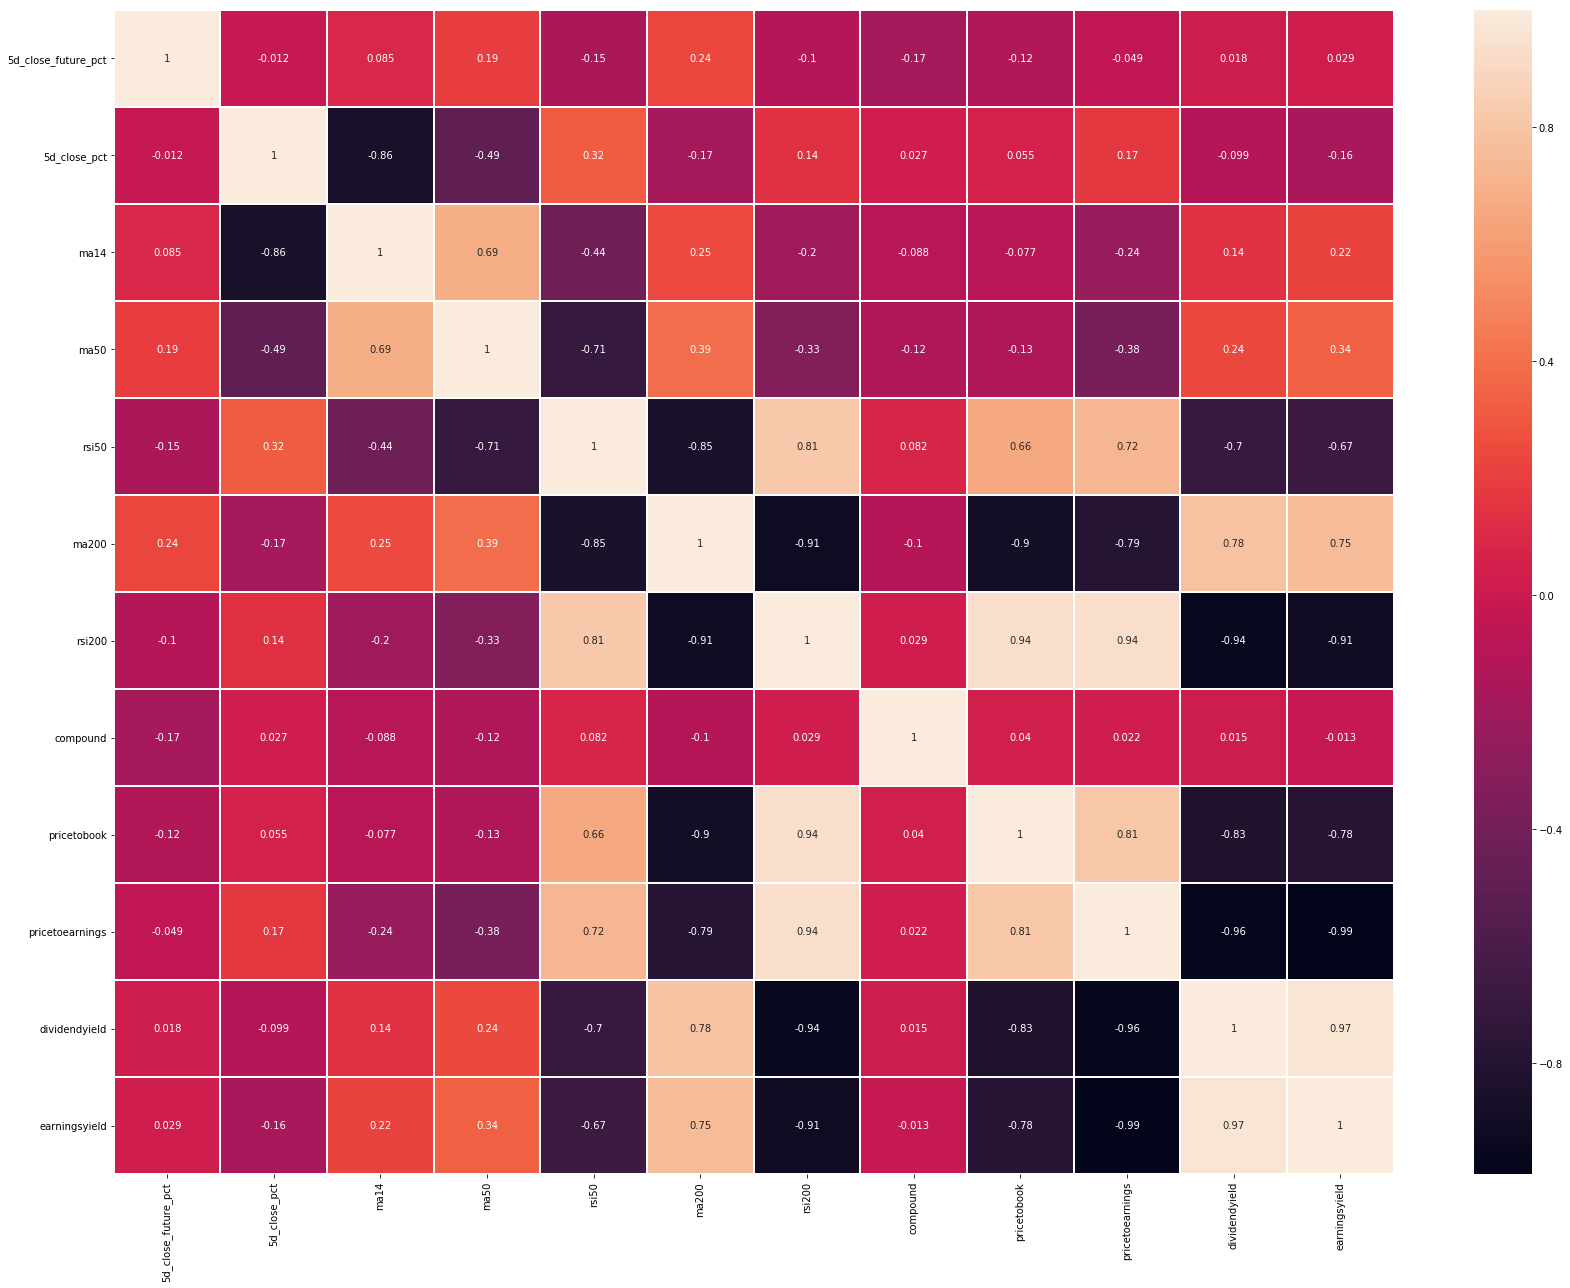

<Figure size 432x288 with 0 Axes>

In [142]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=7):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [59]:
calculate_vif_(train_features,thresh=7)

dropping 'netincomegrowth' at index: 30
Remaining variables:
Index(['const', '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue',
       'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,const,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2018-09-12,1.0,0.012364,1.003189,51.754274,1.004425,55.836737,0.971822,56.027995,0.857815,51.536984,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-11,1.0,0.025706,0.989642,54.843850,0.992118,57.051970,0.963886,56.767636,0.847690,51.778233,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-10,1.0,0.002065,1.012239,48.238273,1.016848,53.999805,0.991171,54.896700,0.869494,51.268924,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-07,1.0,-0.011347,0.997476,51.614997,1.003501,55.329936,0.980317,55.698322,0.858258,51.526752,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-06,1.0,-0.014619,0.990286,53.591010,0.996462,56.125341,0.975189,56.179964,0.851899,51.682465,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-05,1.0,0.026236,0.975304,57.505418,0.980738,57.755151,0.962459,57.175011,0.838315,52.006987,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-09-04,1.0,0.020147,0.971308,58.978101,0.975245,58.387154,0.959284,57.563634,0.833442,52.134684,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-08-31,1.0,0.042596,0.977551,57.919046,0.979877,57.947773,0.965241,57.303664,0.836683,52.066470,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864
2018-08-30,1.0,0.016855,0.990433,54.186912,0.991631,56.384418,0.978157,56.378301,0.846902,51.823750,...,8.103200e+10,3.490000e+11,2.340000e+11,1.150000e+11,5.612000e+10,7.366000e+10,9.125000e+09,-6.938500e+10,1.730000e+11,0.4864


In [126]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_features.values, i) for i in range(train_features.shape[1])]
vif["features"] = train_features.columns

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [127]:
vif.round(1)

,VIF Factor,features
0,0.000000e+00,const
1,4.100000e+00,5d_close_pct
2,1.420000e+01,ma14
3,2.216000e+02,rsi14
4,4.590000e+01,ma30
5,3.022700e+03,rsi30
6,9.210000e+01,ma50
7,2.933200e+03,rsi50
8,1.767000e+02,ma200
9,2.968000e+02,rsi200


In [104]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(544, 12) (435, 12) (109, 12)
(544, 12) (435, 12) (109, 12)


In [105]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.253
Model:                             OLS   Adj. R-squared:                  0.234
Method:                  Least Squares   F-statistic:                     13.04
Date:                 Thu, 08 Aug 2019   Prob (F-statistic):           1.99e-21
Time:                         00:22:31   Log-Likelihood:                 978.29
No. Observations:                  435   AIC:                            -1933.
Df Residuals:                      423   BIC:                            -1884.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8574      

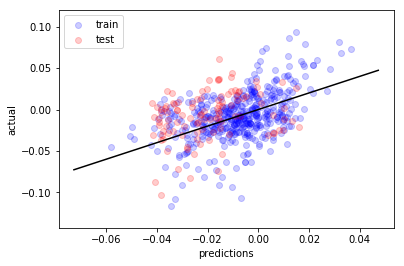

In [106]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [107]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [108]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.2531745101518803
-0.16970454669105206


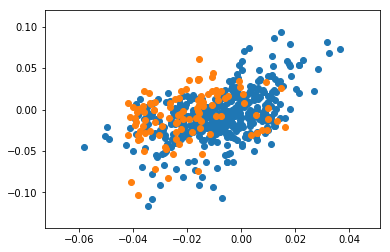

In [109]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(544, 12) (435, 12) (109, 12)
(544, 12) (435, 12) (109, 12)


In [112]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [113]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

-492.0314633349554
-287.0192098687409


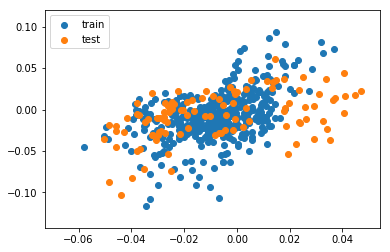

In [114]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Feature Engineering

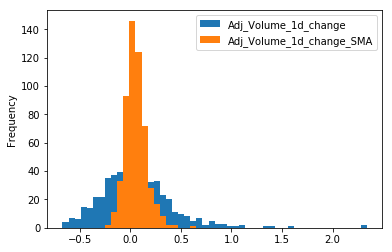

In [115]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)

# Plot histogram of volume % change data
df_price[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [116]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df_price.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df_price.index

# Join the dataframe with the days of week DataFrame
df_price = pd.concat([df_price, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df_price.dropna(inplace=True)  # drop missing values in-place
print(df_price.head())

            Unnamed: 0   adj_close    adj_high     adj_low    adj_open  \
date                                                                     
2018-08-28         235  217.164838  217.995145  216.393838  216.482800   
2018-08-27         236  215.425147  216.215915  213.833725  214.644263   
2018-08-24         237  213.665687  214.397148  212.627803  214.100609   
2018-08-23         238  213.003418  214.545417  212.123688  212.173111   
2018-08-22         239  212.568495  213.863379  211.372458  211.629457   

            adj_volume   close       date frequency    high    ...      \
date                                                           ...       
2018-08-28  22776766.0  219.70 2018-08-28     daily  220.54    ...       
2018-08-27  20525117.0  217.94 2018-08-27     daily  218.74    ...       
2018-08-24  18476356.0  216.16 2018-08-24     daily  216.90    ...       
2018-08-23  18883224.0  215.49 2018-08-23     daily  217.05    ...       
2018-08-22  19018131.0  215.05 2018-0

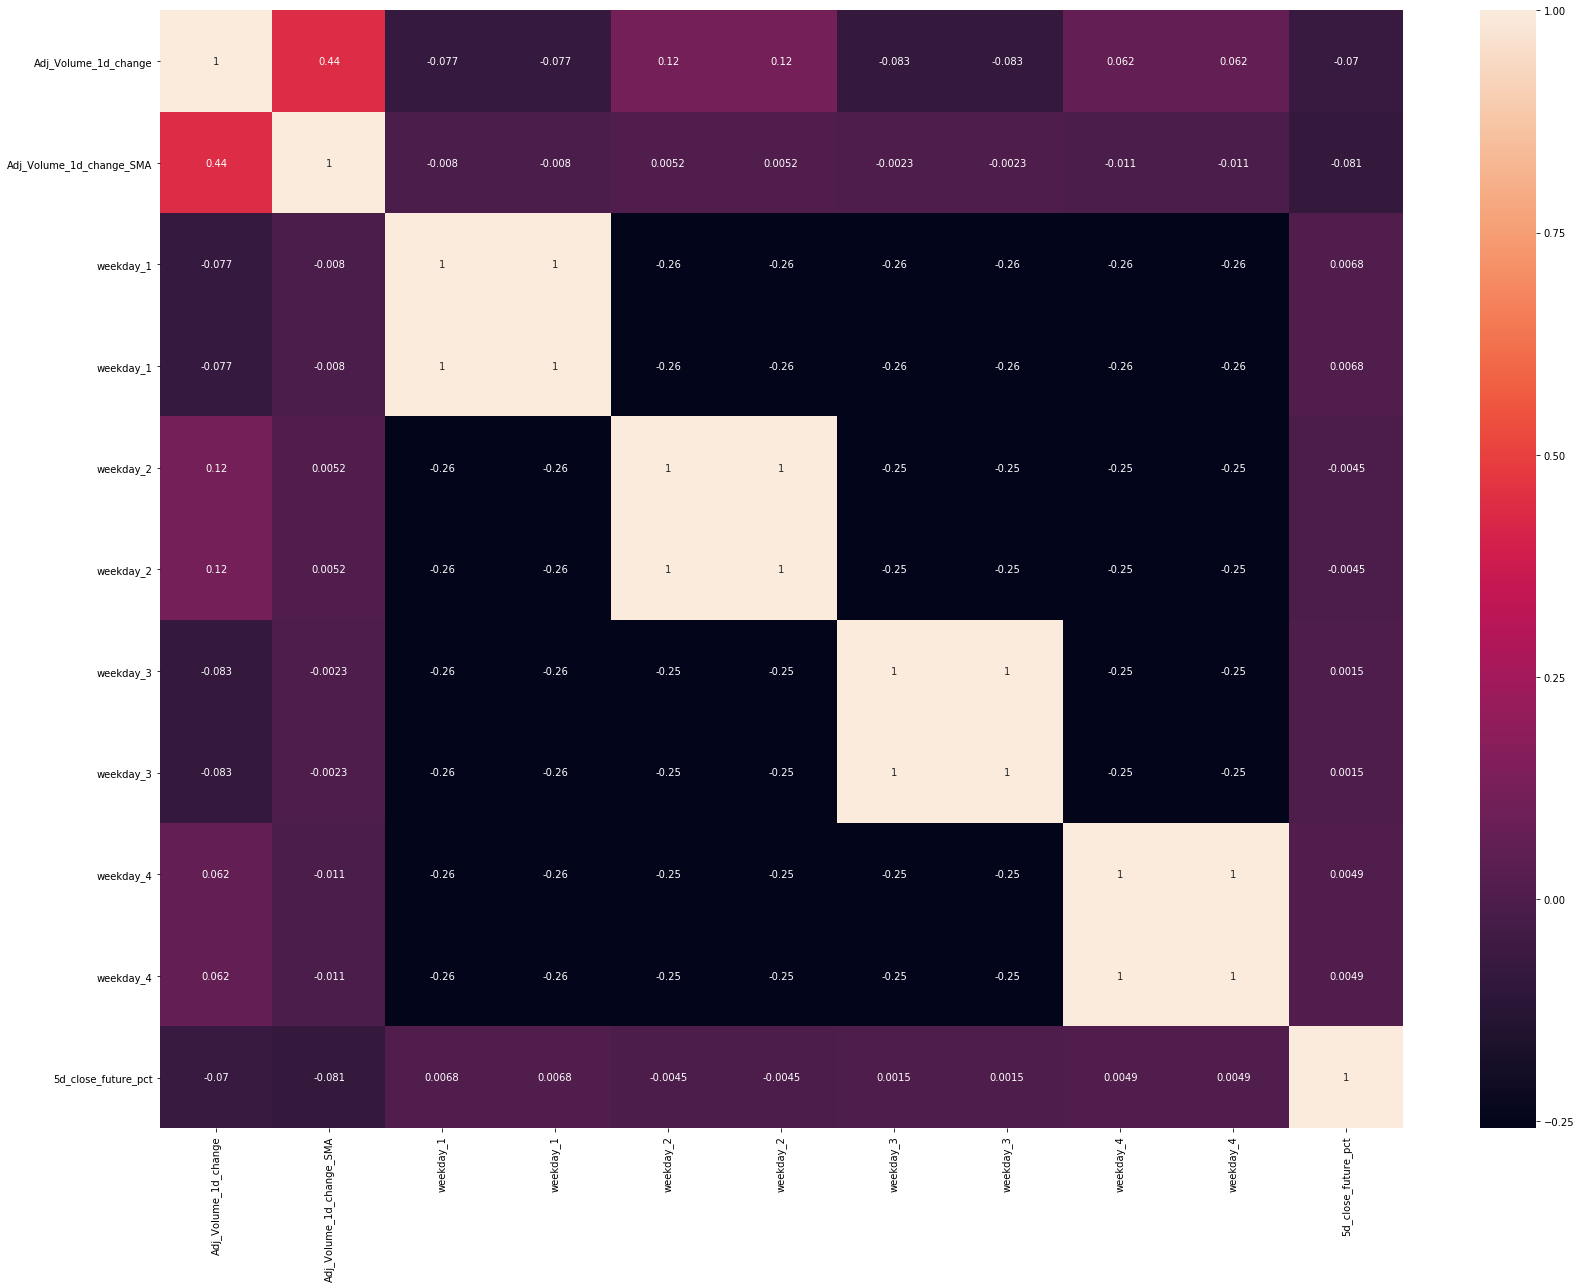

In [117]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
plt.figure(figsize=(24, 18))
# Plot the correlations between the new features and the targets
sns.heatmap(df_price[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.999994844834254
-1.2528637571616157


In [119]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.999994844834254
-1.5849080566748093


In [120]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.22339637043356642
-0.04772838284942038 

max_depth= 5
0.42901012453792525
-0.16442116401524043 

max_depth= 10
0.8360885434640203
-0.5154345883843641 



In [121]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.7606037094698266
-1.6673219226485652 

max_depth= 5
-3.6928104160730575
-2.439100886020968 

max_depth= 10
-3.6738909267239857
-2.443015270864382 



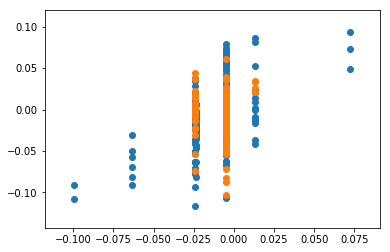

In [122]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9202619521941227
-0.28852224717517116


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [124]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.0012284758878260416 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [125]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.3306572780711805
-0.0012284758878260416


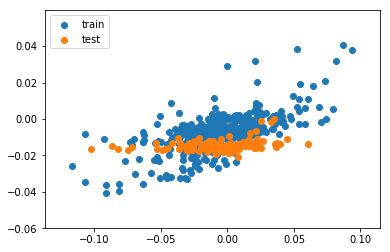

In [126]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

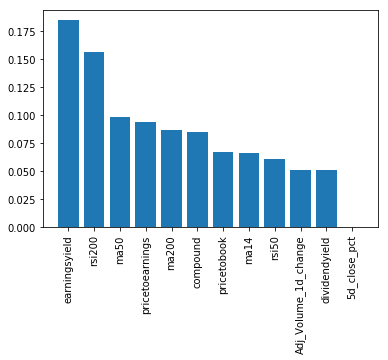

In [127]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.44367757752193376
-0.01870077374428014


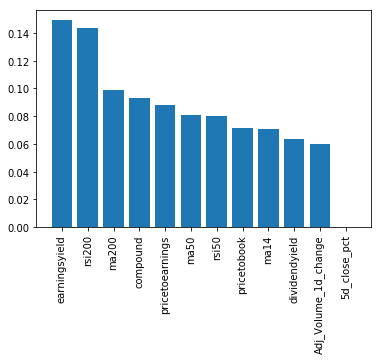

In [129]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

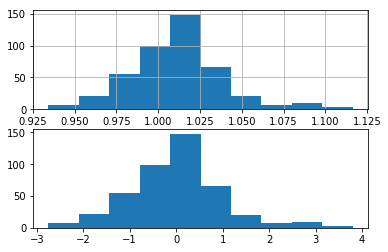

In [130]:


# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [131]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7423634788314815
-0.3099640903231189

n_neighbors = 3
train, test scores
0.6070189131987231
-0.1289922867126967

n_neighbors = 4
train, test scores
0.5333864599154048
-0.031710821946564494

n_neighbors = 5
train, test scores
0.47548459166779344
0.034454954751480305

n_neighbors = 6
train, test scores
0.4398024135855395
0.0728222921300632

n_neighbors = 7
train, test scores
0.40556425585708855
0.0537860750834801

n_neighbors = 8
train, test scores
0.3952380554909165
0.12009256598022122

n_neighbors = 9
train, test scores
0.3795461484003221
0.10813470127521409

n_neighbors = 10
train, test scores
0.3609976781470293
0.0801436444486191

n_neighbors = 11
train, test scores
0.3463301492050509
0.10270449688846972

n_neighbors = 12
train, test scores
0.3343940851918125
0.1039979373191713

n_neighbors = 13
train, test scores
0.33339390560049825
0.10358773309368041

n_neighbors = 14
train, test scores
0.31989419781769646
0.09780456751215316

n_neighbors = 15


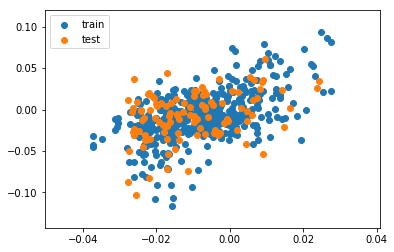

In [132]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [133]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
435/435 [==============================] - 0s 485us/step - loss: 0.0260
Epoch 2/25
435/435 [==============================] - 0s 24us/step - loss: 0.0070
Epoch 3/25
435/435 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 4/25
435/435 [==============================] - 0s 26us/step - loss: 0.0024
Epoch 5/25
435/435 [==============================] - 0s 30us/step - loss: 0.0017
Epoch 6/25
435/435 [==============================] - 0s 24us/step - loss: 0.0014
Epoch 7/25
435/435 [==============================] - 0s 24us/step - loss: 0.0012
Epoch 8/25
435/435 [==============================] - 0s 31us/step - loss: 0.0011
Epoch 9/25
435/435 [==============================] - 0s 25us/step - loss: 0.0010
Epoch 10/25
435/435 [==============================] - 0s 23us/step - loss: 9.5220e-04
Epoch 11/25
435/435 [==============================] - 0s 23us/step - loss: 8.6520e-04
Epoch 12/25
435/435 [==============================] - 0s 27us/step - loss: 8.1908e-04


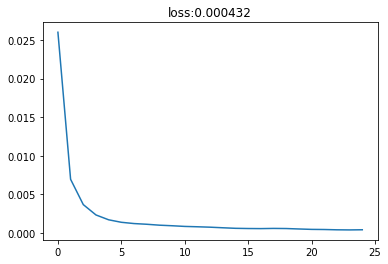

In [134]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.5808282451483366
-5.617920026596446


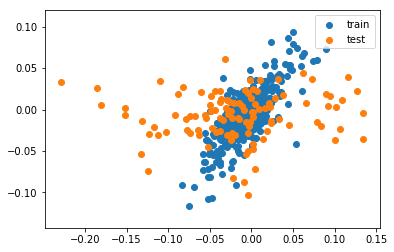

In [135]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [136]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c421a5f28>


Epoch 1/25
435/435 [==============================] - 0s 540us/step - loss: 1.1825
Epoch 2/25
435/435 [==============================] - 0s 32us/step - loss: 0.2471
Epoch 3/25
435/435 [==============================] - 0s 32us/step - loss: 0.1571
Epoch 4/25
435/435 [==============================] - 0s 28us/step - loss: 0.1061
Epoch 5/25
435/435 [==============================] - 0s 31us/step - loss: 0.0847
Epoch 6/25
435/435 [==============================] - 0s 30us/step - loss: 0.0706
Epoch 7/25
435/435 [==============================] - 0s 27us/step - loss: 0.0635
Epoch 8/25
435/435 [==============================] - 0s 33us/step - loss: 0.0507
Epoch 9/25
435/435 [==============================] - 0s 29us/step - loss: 0.0531
Epoch 10/25
435/435 [==============================] - 0s 27us/step - loss: 0.0442
Epoch 11/25
435/435 [==============================] - 0s 32us/step - loss: 0.0321
Epoch 12/25
435/435 [==============================] - 0s 29us/step - loss: 0.0345
Epoch 13/25


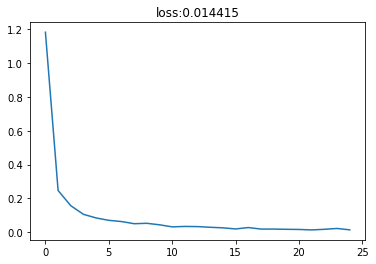

In [137]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.2748702818598824
-0.5274564740481589


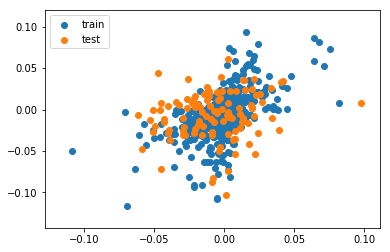

In [138]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
435/435 [==============================] - 0s 650us/step - loss: 0.0297
Epoch 2/25
435/435 [==============================] - 0s 25us/step - loss: 0.0134
Epoch 3/25
435/435 [==============================] - 0s 25us/step - loss: 0.0073
Epoch 4/25
435/435 [==============================] - 0s 32us/step - loss: 0.0060
Epoch 5/25
435/435 [==============================] - 0s 31us/step - loss: 0.0046
Epoch 6/25
435/435 [==============================] - 0s 28us/step - loss: 0.0046
Epoch 7/25
435/435 [==============================] - 0s 32us/step - loss: 0.0031
Epoch 8/25
435/435 [==============================] - 0s 28us/step - loss: 0.0032
Epoch 9/25
435/435 [==============================] - 0s 32us/step - loss: 0.0024
Epoch 10/25
435/435 [==============================] - 0s 29us/step - loss: 0.0021
Epoch 11/25
435/435 [==============================] - 0s 30us/step - loss: 0.0018
Epoch 12/25
435/435 [==============================] - 0s 27us/step - loss: 0.0016
Epoch 13/25


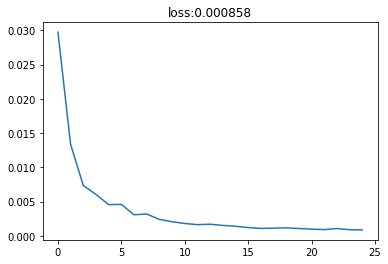

In [139]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [140]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.04904379 -0.03418435 -0.05057637 -0.0409393  -0.04268004]


0.5032379412393633
-0.4426296412382913


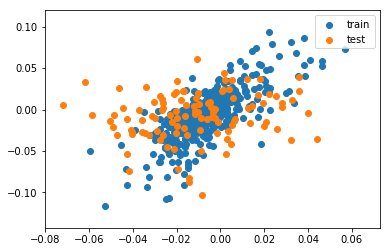

In [141]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()